1.A Create and plot a linearly separable dataset in 2D with at least 1000 data points. Clearly
label the two classes. (3 marks)

1.B Train the Perceptron Learning Algorithm on this dataset. Plot the decision boundary after
training . (5 marks)

weights and bias [0.21000783 0.20979151] -0.21000000000000005


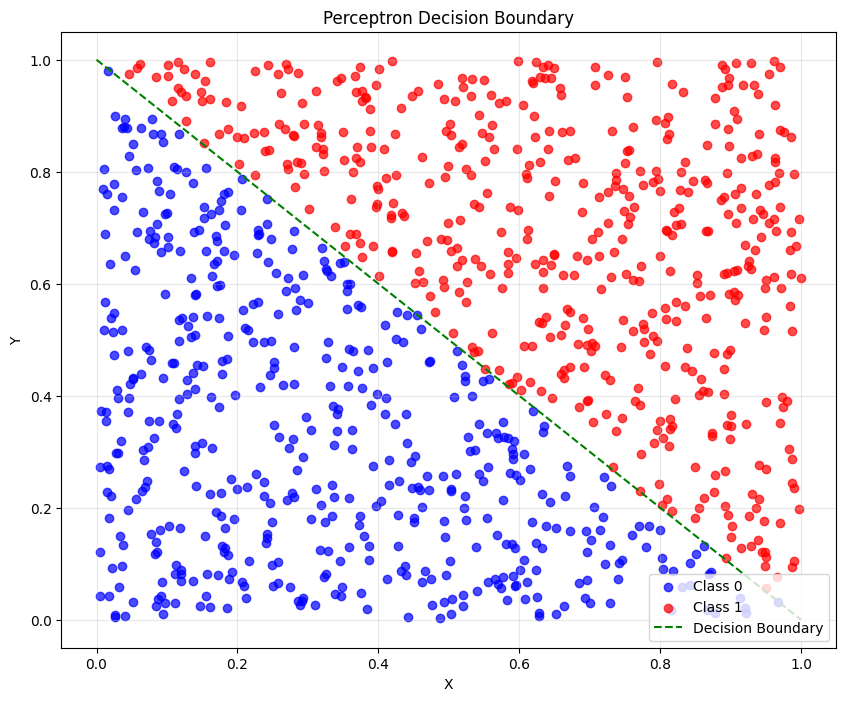

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
np.random.seed(42)
n_points = 500
x = np.random.rand(n_points * 2)
y = np.random.rand(n_points * 2)
X = np.column_stack((x, y))
labels = np.where(x + y > 1, 1, 0)

# Perceptron Learning Algorithm
def perceptron_train(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iterations):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = 1 if linear_output >= 0 else 0
            update = learning_rate * (y[idx] - y_predicted)
            weights += update * x_i
            bias += update

    return weights, bias

# Train perceptron
weights, bias = perceptron_train(X, labels)
print("weights and bias",weights, bias)


# Plot dataset and decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], color='red', label='Class 1', alpha=0.7)

# Plot decision boundary
x1 = np.array([0, 1])
m = -weights[0] / weights[1]
c = -bias / weights[1]
x2 = m * x1 + c
plt.plot(x1, x2, 'g--', label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



1.C
Add noise to the dataset by flipping the labels of 10% of the points.
• Plot the noisy dataset.
• Train the Perceptron Learning Algorithm for different numbers of iterations.
• Compare the results visually (decision boundaries) and quantitatively (accuracy or number of misclassifications).

Iterations: 50, Final misclassifications: 270, Accuracy: 0.73
Iterations: 100, Final misclassifications: 274, Accuracy: 0.73
Iterations: 500, Final misclassifications: 262, Accuracy: 0.74


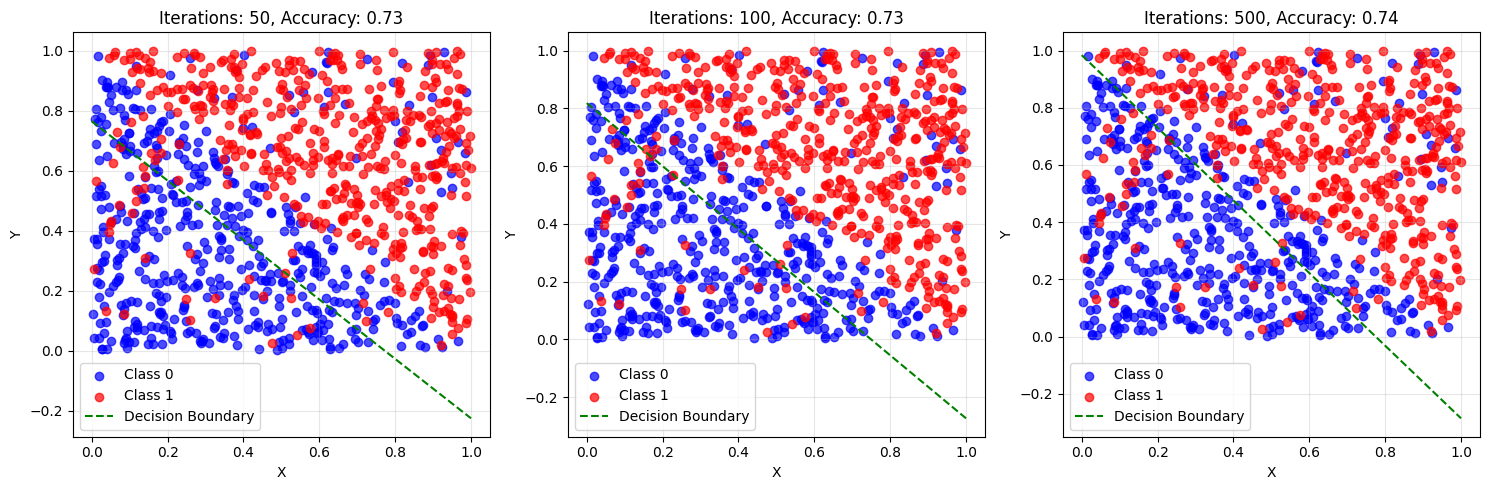

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
np.random.seed(42)
n_points = 500
x = np.random.rand(n_points * 2)
y = np.random.rand(n_points * 2)
X = np.column_stack((x, y))
original_labels = np.where(x + y > 1, 1, 0)

# Create noisy dataset by flipping 10% of the labels
noisy_labels = original_labels.copy()
noise_indices = np.random.choice(len(noisy_labels), size=int(0.1 * len(noisy_labels)), replace=False)
noisy_labels[noise_indices] = 1 - noisy_labels[noise_indices]

# Perceptron Learning Algorithm with accuracy tracking
def perceptron_train_with_accuracy(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassifications = []
    accuracies = []

    for _ in range(n_iterations):
        misclassified = 0
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = 1 if linear_output >= 0 else 0
            if y_predicted != y[idx]:
                misclassified += 1
                update = learning_rate * (y[idx] - y_predicted)
                weights += update * x_i
                bias += update
        misclassifications.append(misclassified)
        accuracy = (n_samples - misclassified) / n_samples
        accuracies.append(accuracy)

    return weights, bias, misclassifications, accuracies

# Train perceptron and plot results for different iterations
iterations = [50, 100, 500]
plt.figure(figsize=(15, 5))

for i, n_iter in enumerate(iterations):
    weights, bias, misclassifications, accuracies = perceptron_train_with_accuracy(X, noisy_labels, n_iterations=n_iter)

    plt.subplot(1, 3, i+1)
    plt.scatter(X[noisy_labels == 0][:, 0], X[noisy_labels == 0][:, 1], color='blue', label='Class 0', alpha=0.7)
    plt.scatter(X[noisy_labels == 1][:, 0], X[noisy_labels == 1][:, 1], color='red', label='Class 1', alpha=0.7)

    # Plot decision boundary
    x1 = np.array([0, 1])
    m = -weights[0] / weights[1]
    c = -bias / weights[1]
    x2 = m * x1 + c
    plt.plot(x1, x2, 'g--', label='Decision Boundary')

    plt.title(f'Iterations: {n_iter}, Accuracy: {accuracies[-1]:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print(f"Iterations: {n_iter}, Final misclassifications: {misclassifications[-1]}, Accuracy: {accuracies[-1]:.2f}")

plt.tight_layout()
plt.show()


2. Gradient Descent (10 Marks)

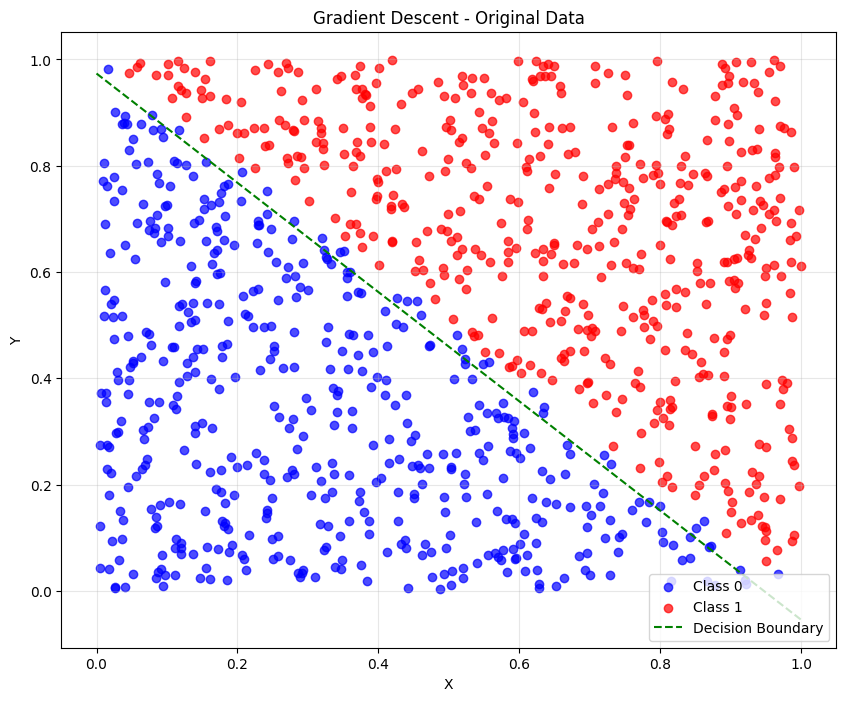

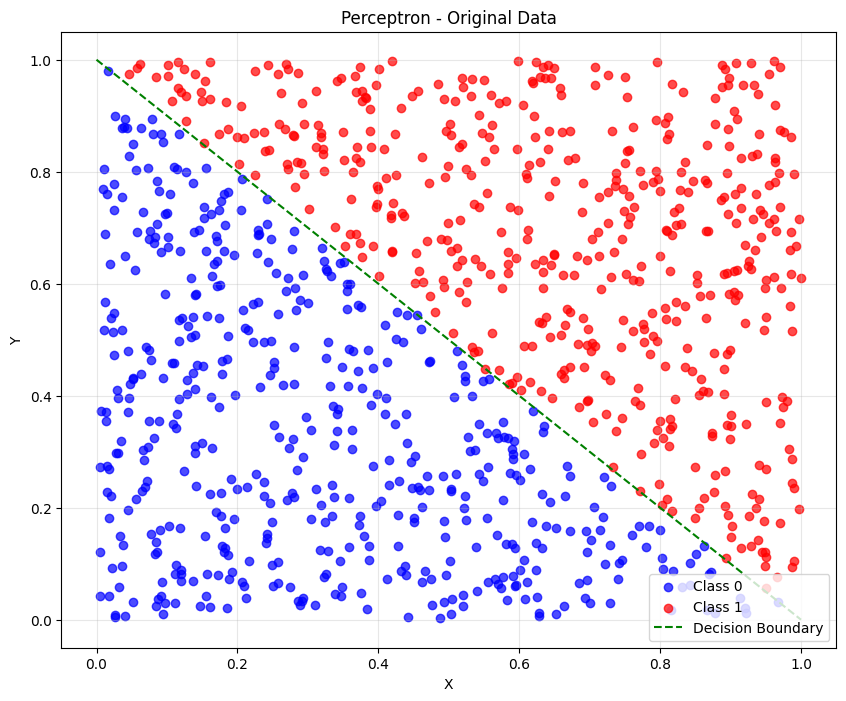

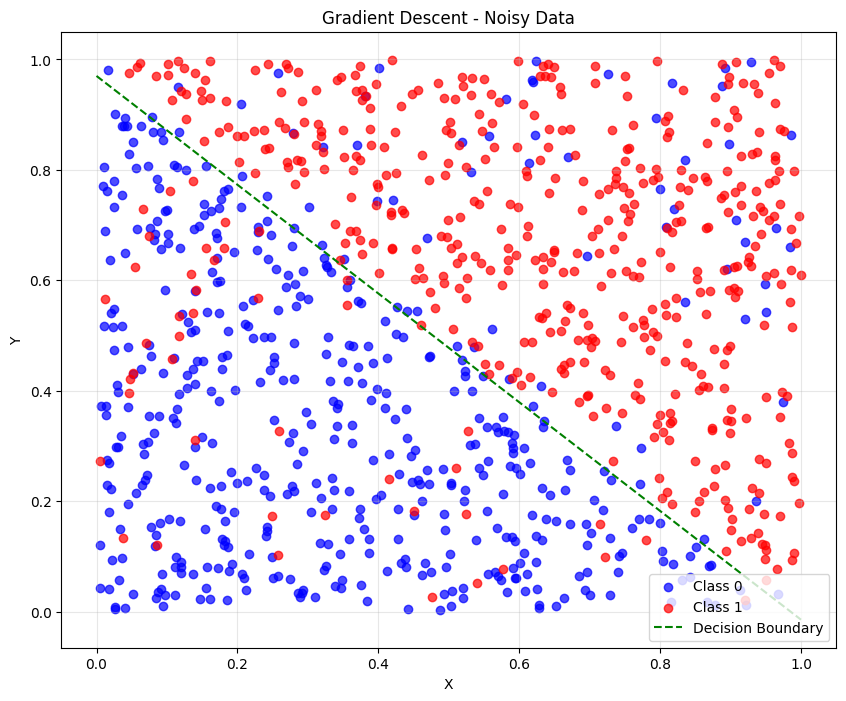

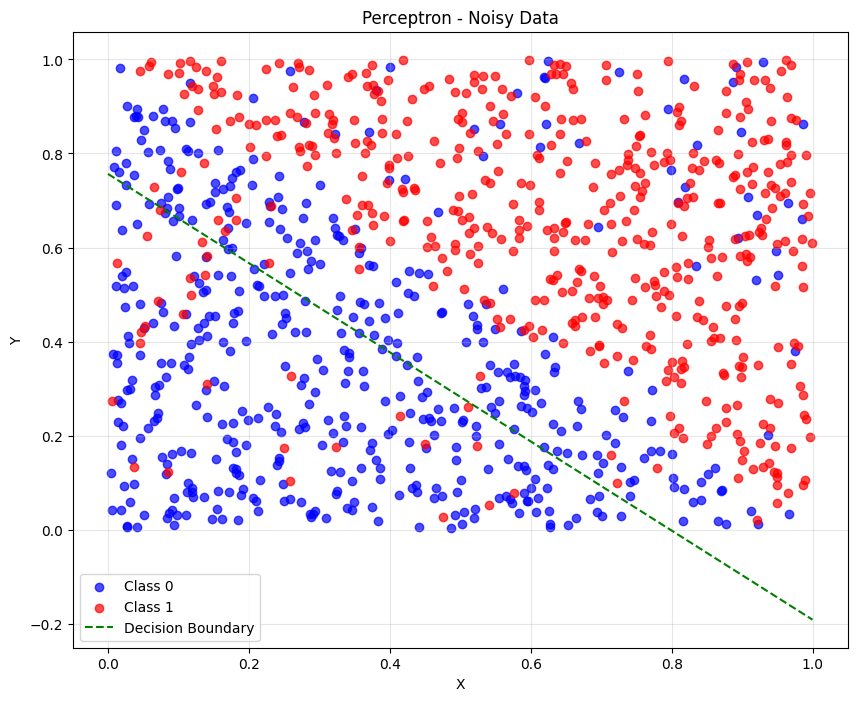

Gradient Descent - Original Data Accuracy: 0.97
Perceptron - Original Data Accuracy: 1.0
Gradient Descent - Noisy Data Accuracy: 0.887
Perceptron - Noisy Data Accuracy: 0.742
Gradient Descent - Sensitivity to Noise: 0.08556701030927831
Perceptron - Sensitivity to Noise: 0.258


In [56]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Perceptron Learning Algorithm
def perceptron_train(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iterations):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = 1 if linear_output >= 0 else 0
            if y_predicted != y[idx]:
                update = learning_rate * (y[idx] - y_predicted)
                weights += update * x_i
                bias += update

    return weights, bias

# Function to plot decision boundary
def plot_decision_boundary(X, y, weights, bias, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.7)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.7)

    x1 = np.array([0, 1])
    m = -weights[0] / weights[1]
    c = -bias / weights[1]
    x2 = m * x1 + c
    plt.plot(x1, x2, 'g--', label='Decision Boundary')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Train and plot for original data
gd_weights_original, gd_bias_original = gradient_descent(X, original_labels)
perceptron_weights_original, perceptron_bias_original = perceptron_train(X, original_labels)

plot_decision_boundary(X, original_labels, gd_weights_original, gd_bias_original, 'Gradient Descent - Original Data')
plot_decision_boundary(X, original_labels, perceptron_weights_original, perceptron_bias_original, 'Perceptron - Original Data')

# Train and plot for noisy data
gd_weights_noisy, gd_bias_noisy = gradient_descent(X, noisy_labels)
perceptron_weights_noisy, perceptron_bias_noisy = perceptron_train(X, noisy_labels)

plot_decision_boundary(X, noisy_labels, gd_weights_noisy, gd_bias_noisy, 'Gradient Descent - Noisy Data')
plot_decision_boundary(X, noisy_labels, perceptron_weights_noisy, perceptron_bias_noisy, 'Perceptron - Noisy Data')

# Compare performance
def predict(X, weights, bias):
    return np.where(np.dot(X, weights) + bias >= 0, 1, 0)

gd_accuracy_original = accuracy_score(original_labels, predict(X, gd_weights_original, gd_bias_original))
perceptron_accuracy_original = accuracy_score(original_labels, predict(X, perceptron_weights_original, perceptron_bias_original))

gd_accuracy_noisy = accuracy_score(noisy_labels, predict(X, gd_weights_noisy, gd_bias_noisy))
perceptron_accuracy_noisy = accuracy_score(noisy_labels, predict(X, perceptron_weights_noisy, perceptron_bias_noisy))

print("Gradient Descent - Original Data Accuracy:", gd_accuracy_original)
print("Perceptron - Original Data Accuracy:", perceptron_accuracy_original)
print("Gradient Descent - Noisy Data Accuracy:", gd_accuracy_noisy)
print("Perceptron - Noisy Data Accuracy:", perceptron_accuracy_noisy)

# Calculate sensitivity to noise
gd_sensitivity = (gd_accuracy_original - gd_accuracy_noisy) / gd_accuracy_original
perceptron_sensitivity = (perceptron_accuracy_original - perceptron_accuracy_noisy) / perceptron_accuracy_original

print("Gradient Descent - Sensitivity to Noise:", gd_sensitivity)
print("Perceptron - Sensitivity to Noise:", perceptron_sensitivity)


3. MLP with a single hidden layer

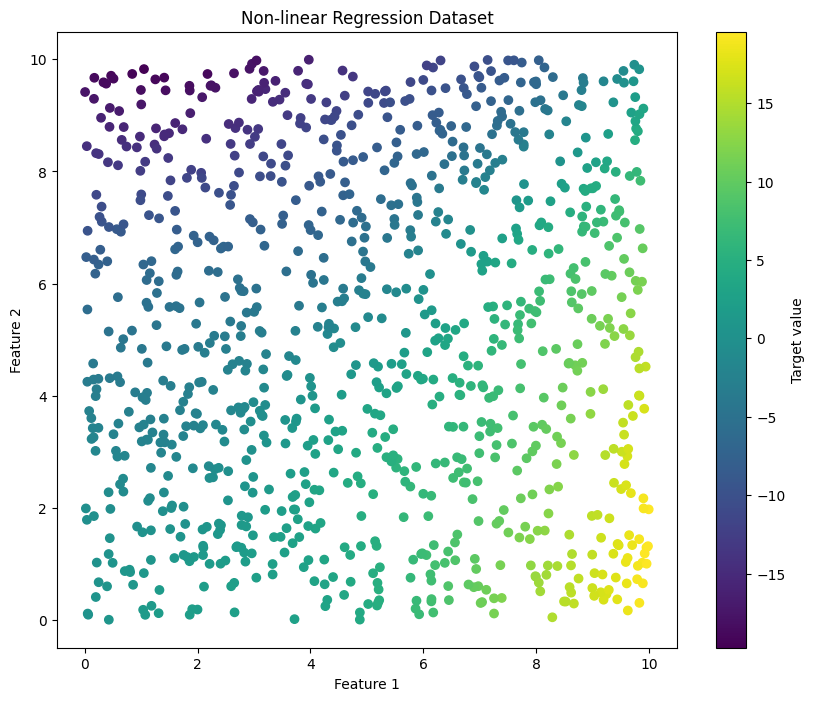

In [60]:
# import numpy as np
# import matplotlib.pyplot as plt

# def create_nonlinear_dataset(n_samples=1000):
#     np.random.seed(0)
#     X = np.random.rand(n_samples, 2) * 10
#     y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.random.normal(0, 0.1, n_samples)
#     return X, y

# X, y = create_nonlinear_dataset()
import numpy as np
import matplotlib.pyplot as plt

def create_nonlinear_dataset(n_samples=1000):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2) * 10

    # Creating more complex non-linear patterns using combinations of functions
    y = (np.sin(X[:, 0]) * np.cos(X[:, 1]) +  # Multiplication of trig functions
         0.5 * np.exp(-(X[:, 0]**2 + X[:, 1]**2)/50) +  # Gaussian-like function
         0.2 * (X[:, 0]**2 - X[:, 1]**2) +  # Quadratic terms
         np.random.normal(0, 0.1, n_samples))  # Random noise

    return X, y

# Generate and visualize the dataset
X, y = create_nonlinear_dataset()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Target value')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linear Regression Dataset')
plt.show()

In [61]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, init_type='random'):
        if init_type == 'random':
            self.W1 = np.random.randn(input_size, hidden_size) * 0.01
            self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        else:  # zero initialization
            self.W1 = np.zeros((input_size, hidden_size))
            self.W2 = np.zeros((hidden_size, output_size))

        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        return self.Z2

    def backward(self, X, y, output, learning_rate):
        m = X.shape[0]
        dZ2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (1 - np.tanh(self.Z1) ** 2)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2


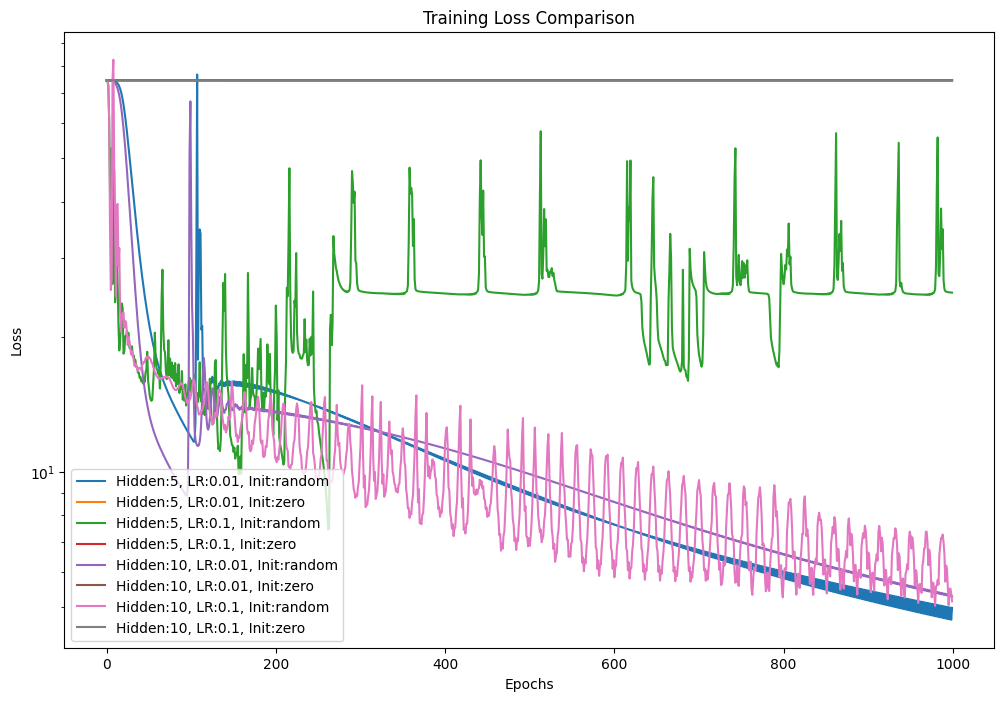

In [62]:
def train_mlp(mlp, X, y, learning_rate=0.01, epochs=1000, loss_type='mse'):
    loss_values = []
    for epoch in range(epochs):
        output = mlp.forward(X)

        if loss_type == 'mse':
            loss = np.mean((y.reshape(-1, 1) - output) ** 2)
        else:  # mae
            loss = np.mean(np.abs(y.reshape(-1, 1) - output))

        loss_values.append(loss)
        mlp.backward(X, y, output, learning_rate)
    return loss_values

# Initialize different models
input_size, output_size = 2, 1
hidden_sizes = [5, 10]  # Different hidden layer sizes
learning_rates = [0.01, 0.1]  # Different learning rates
init_types = ['random', 'zero']  # Different initialization types
loss_types = ['mse', 'mae']  # Different loss functions

# Train and plot results
plt.figure(figsize=(12, 8))
for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for init in init_types:
            mlp = MLP(input_size, hidden_size, output_size, init_type=init)
            losses = train_mlp(mlp, X, y, learning_rate=lr)
            plt.plot(losses, label=f'Hidden:{hidden_size}, LR:{lr}, Init:{init}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.yscale('log')
plt.show()
